#**Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd

**Loading the Dataset**

In [2]:
df = pd.read_csv('https://trello-attachments.s3.amazonaws.com/600d1f10d700af20b1924b3c/600d1f700fcd073384905133/4875f4c4af388917d8508e224b3d7219/telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##**First step of data analysis**

--> Retrieve the column names

df.columns

churn 2 values, 0 or 1

if it is False = Active User

True = Churn user

churn - customer stopped using the app

In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

**Checking dimensions of datasets**

Checking rows and columns of data

In [4]:
df.shape
#3333 records/rows, 21 columns

(3333, 21)

In [5]:
# info() --> used to generate full summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Changing datatype of one column to another**

e.g churn(bool) to float

In [6]:
# astype() --> used to change the datatype
df['churn'] = df['churn'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#**describe() method**

--> used to give statistical summary

--> by default this method works only int(int64) and float(float64) values

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


**Generating Statistical Summary of Non-Numerical Features / object**

--> use **include** parameter in **describe()**

In [8]:
df.describe(include=['object','bool'])
# It is only going to print statistical summary for objects and bool (anything you specify)

#count --> how many total of values


,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,377-2725,no,no
freq,106,1,3010,2411


**Understanding unique**

In [11]:
data = pd.Series(['A','B','C','A','C','D','E','C','B','C','B','A'])
data.describe()

#unique --> counts only unique values, repeated values are ignored

#top is C --> because it is the top repeated character
#freq is 4 --> it will show how much the TOP is repeated

count     12
unique     5
top        C
freq       4
dtype: object

#**Counting Active Users vs Churn Users**

--> use value_counts() tells u how many time the value is repeated

In [12]:
df['churn'].value_counts()
# 0 --> active users
# 1 --> churn users

0    2850
1     483
Name: churn, dtype: int64

In [13]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


##**Performing Sorting Operations**

df.sort_values(by='YourColumnName')

In [15]:
df.sort_values(by='total day charge').head(10) #By default, in ascending order

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
1052,OR,98,415,378-6772,yes,no,0,12.5,67,2.13,256.6,90,21.81,169.4,88,7.62,7.7,9,2.08,1,0
2252,NH,148,408,333-7449,no,no,0,17.6,121,2.99,161.7,125,13.74,203.1,82,9.14,10.6,6,2.86,1,0
3046,MI,110,510,357-5784,no,no,0,18.9,92,3.21,258.4,81,21.96,109.6,74,4.93,14.8,4,4.00,1,0
1621,SC,138,510,370-9533,no,yes,21,19.5,149,3.32,140.9,109,11.98,179.7,111,8.09,7.9,1,2.13,0,0
1076,WY,53,415,337-4339,no,yes,27,25.9,119,4.40,206.5,96,17.55,228.1,64,10.26,6.5,7,1.76,1,0


##**Sorting by Descending Order**

In [17]:
df.sort_values(by='total day charge',ascending=False).head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
975,DE,129,510,332-6181,no,no,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,1
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
1679,OK,82,510,393-4823,no,no,0,329.8,73,56.07,208.3,120,17.71,267.1,102,12.02,10.6,6,2.86,0,1
2028,SD,93,510,408-4836,no,no,0,328.1,106,55.78,151.7,89,12.89,303.5,114,13.66,8.7,3,2.35,1,1
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1


##**Sorting Multiple Columns**

In [18]:
df.sort_values(by=['total day minutes','total day calls']).head(10)
#Not recommended, you need to analyse them 1 by 1. Might result in invalid results

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
1052,OR,98,415,378-6772,yes,no,0,12.5,67,2.13,256.6,90,21.81,169.4,88,7.62,7.7,9,2.08,1,0
2252,NH,148,408,333-7449,no,no,0,17.6,121,2.99,161.7,125,13.74,203.1,82,9.14,10.6,6,2.86,1,0
3046,MI,110,510,357-5784,no,no,0,18.9,92,3.21,258.4,81,21.96,109.6,74,4.93,14.8,4,4.00,1,0
1621,SC,138,510,370-9533,no,yes,21,19.5,149,3.32,140.9,109,11.98,179.7,111,8.09,7.9,1,2.13,0,0
1076,WY,53,415,337-4339,no,yes,27,25.9,119,4.40,206.5,96,17.55,228.1,64,10.26,6.5,7,1.76,1,0


#**Understanding Basic Inqueries/Questions to ask Mr Computer**

What is the maximum total value of total day charge?

In [21]:
df['total day charge'].max()

59.64

How much time on an average do **churn users** spend on phone during daytime?

df[df['churn']==1] gives only information of churn users

In [22]:
df[df['churn']==1]['total day minutes'].mean()

206.91407867494814

How about active users?

In [23]:
df[df['churn']==0]['total day minutes'].mean()

175.17575438596492

**Active users** are **spending less time** on the phone than **churn users**, but still they leave our phone subscription. Why?

Active user = 175mins avg

Churn = 206mins avg

This becomes an area of concern on why they have become a churn user.

**What is the maximum length of international calls among loyal(Active) users?**

In [25]:
df[df['churn']==0]['total intl calls'].max()

19

**Returning maximum values for every column**

In [26]:
df.max()

state                           WY
account length                 243
area code                      510
phone number              422-9964
international plan             yes
voice mail plan                yes
number vmail messages           51
total day minutes            350.8
total day calls                165
total day charge             59.64
total eve minutes            363.7
total eve calls                170
total eve charge             30.91
total night minutes            395
total night calls              175
total night charge           17.77
total intl minutes              20
total intl calls                20
total intl charge              5.4
customer service calls           9
churn                            1
dtype: object

**Applying Advanced Queries**

Retrieve only those records where **state** starts with **letter 'W'**

Info/scenario : Maximum churn users are more belonging to this area --> **worldHeritage**

In [30]:
#Filtering out data by state
# Applying lambda function to df, use .apply()
# The lambda will check all the states, and ONLY looking for state with index 0 starting
# with W
df[df['state'].apply(lambda state: state[0]=='W')].head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


#**Checking for missing values**

If you have missing values, make sure to clean them first, then proceed with the analysis

In [31]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#**Generating graphs from the data**

Represent information of churn user in a pictorial representation

using seaborn library

In [33]:
import seaborn as sns

# Setting the configuration as seaborn
sns.set()

# set seaborn graphs as svg (more sharper than jpeg/png)
%config InlineBackend.figure_format = 'svg'

##**Generating graphs of active users and churn users**

sns.countplot(x='YourXAxis', data = WhereYourData)

e.g x = 'churn' and since our data is df(refer above lines)

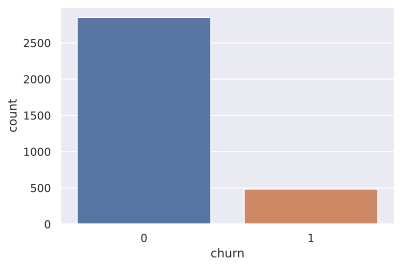

In [34]:
sns.countplot(x='churn',data=df)